In [1]:
using IJulia
#installkernel("Julia (n threads)", env=Dict("JULIA_NUM_THREADS"=>"n"))

In [1]:
include("ValueFunctions.jl")
include("BeliefStateTransitions.jl")
include("../examples/SurplusProduction.jl")

Main.SurplusProduction

In [ ]:
# harvest = vcat(collect(0.0:1.0:9.0),collect(10:2.5:50))
# observations = [0,1]
# actions = reshape(collect(Iterators.product(harvest, observations)), length(harvest)*length(observations))


# V = ValueFunctions.init_Norm2DGrid(log(200.0),log(0.5),0.25,100)
# model=BeliefStateTransitions.init_model(SurplusProduction.T,
#     SurplusProduction.H,
#     actions,
#     SurplusProduction.Sigma_O,
#     SurplusProduction.Sigma_N,
#     1)

# grid1=BeliefStateTransitions.init_transitions("particle Quad",model,V;Nfilter=20000)

# BeliefStateTransitions.computeTransitions!(grid1)
# using JLD2
# @save "grid_2.jld2" grid1

In [3]:
"quadrature"

harvest = collect(0.0:0.5:50)
observations = [0,1]
actions = reshape(collect(Iterators.product(harvest, observations)), length(harvest)*length(observations))


V = ValueFunctions.init_Norm2DGrid(log(125.0),log(0.5),0.3,100)
model=BeliefStateTransitions.init_model(SurplusProduction.T,
    SurplusProduction.H,
    actions,
    SurplusProduction.Sigma_O2,
    SurplusProduction.Sigma_N,
    1)

grid4=BeliefStateTransitions.init_transitions("quadrature",model,V;mQuad = 35)

BeliefStateTransitions.computeTransitions!(grid4)

using JLD2
@save "grid_4.jld2" grid4

┌ Info:  started timer at: 2022-09-26T13:35:20.160
└ @ TickTock /Users/johnbuckner/.julia/packages/TickTock/fGILW/src/TickTock.jl:54


progress = 2.0%  time: 69.0
progress = 4.0%  time: 120.0
progress = 6.0%  time: 170.0
progress = 8.0%  time: 221.0
progress = 10.0%  time: 273.0
progress = 12.0%  time: 324.0
progress = 14.0%  time: 375.0
progress = 16.0%  time: 426.0
progress = 18.0%  time: 478.0
progress = 20.0%  time: 529.0
progress = 22.0%  time: 580.0
progress = 24.0%  time: 631.0
progress = 26.0%  time: 682.0
progress = 28.0%  time: 735.0
progress = 30.0%  time: 786.0
progress = 32.0%  time: 837.0
progress = 34.0%  time: 888.0
progress = 36.0%  time: 939.0
progress = 38.0%  time: 990.0
progress = 40.0%  time: 1042.0
progress = 42.0%  time: 1094.0
progress = 44.0%  time: 1145.0
progress = 46.0%  time: 1196.0
progress = 48.0%  time: 1246.0
progress = 50.0%  time: 1295.0
progress = 52.0%  time: 1350.0
progress = 54.0%  time: 1398.0
progress = 56.0%  time: 1448.0
progress = 58.0%  time: 1508.0
progress = 60.0%  time: 1572.0
progress = 62.0%  time: 1630.0
progress = 64.0%  time: 1683.0
progress = 66.0%  time: 1736.0
p

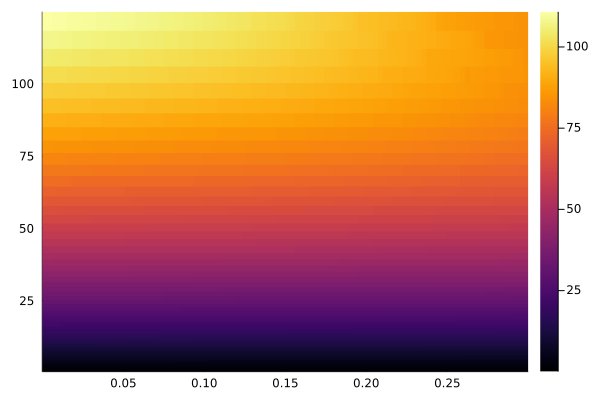

In [5]:
using Plots
N = 100
acc = zeros(N,N)
for i in 1:N
    for j in 1:N
        acc[i,j]=sum(grid4.values[i,j,103,:,1] .* grid4.weights)
    end 
end 
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),exp.(acc))

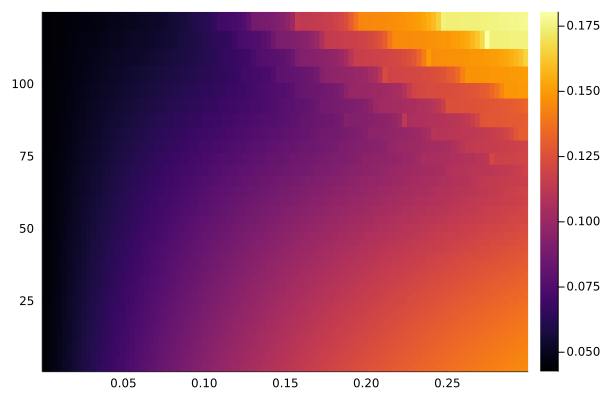

In [6]:
acc = zeros(N,N)
for i in 1:N
    for j in 1:N
        acc[i,j]=sum(grid4.values[i,j,102,:,2] .* grid4.weights)
    end 
end 
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),acc)

In [17]:

include("../examples/SurplusProduction.jl")

include("MDPsolver.jl")
cov = zeros(1,1)
cov[1,1] = 0.05

xQuad = MDPsolver.MvGaussHermite.init_mutable(10,zeros(1),cov)

struct objective2
    delta::Float64
    R::Function 
    actions::AbstractVector
end 
obj = objective2(0.925, (x,a) -> SurplusProduction.R2(x,a[1],a[2]), [1,2,3])
V7 =  MDPsolver.ValueFunctions.init_Norm2DGrid(log(125.0),log(0.5),0.3,100)
print(" ")

In [18]:
using JLD2
@load "grid_4.jld2"
MDPsolver.solve_parallel(grid4,V7,obj,xQuad)
@save "sol_7.jld2" V7

interation: 1  convergence: 100000
interation: 2  convergence: 58074.79739028504
interation: 3  convergence: 26684.147463145036
interation: 4  convergence: 16739.35141139741
interation: 5  convergence: 12134.513616620938
interation: 6  convergence: 9062.93730239938
interation: 7  convergence: 7004.754317930684
interation: 8  convergence: 5487.268490715437
interation: 9  convergence: 4415.222135679548
interation: 10  convergence: 3627.373184269479
interation: 11  convergence: 3057.1728787381385
interation: 12  convergence: 2630.582619062387
interation: 13  convergence: 2307.9400438640196
interation: 14  convergence: 2050.3033023048897
interation: 15  convergence: 1838.783033294333
interation: 16  convergence: 1657.3056597397629
interation: 17  convergence: 1498.281776084863
interation: 18  convergence: 1353.9426400725602
interation: 19  convergence: 1213.6404049387882
interation: 20  convergence: 1092.1308208004673
interation: 21  convergence: 981.7719368022489
interation: 22  convergen

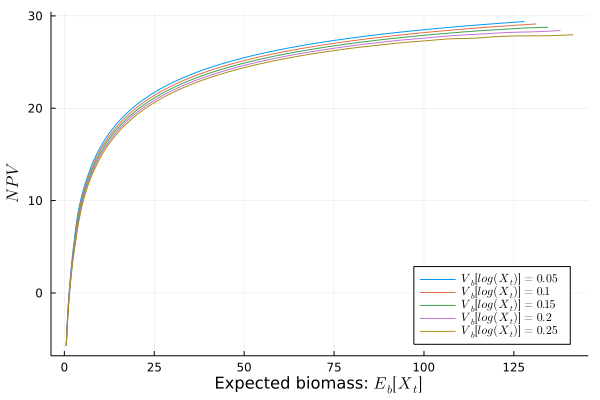

In [66]:
using Plots
using LaTeXStrings
meanNodes = log(0.5):0.005:log(125)
Plots.plot(exp.(meanNodes.+0.5*0.05),broadcast(x->V7([x,0.05]), meanNodes), label = L"V_b[log(X_t)] = 0.05")
Plots.plot!(exp.(meanNodes.+0.5*0.1),broadcast(x->V7([x,0.1]), meanNodes), label = L"V_b[log(X_t)] = 0.1")
Plots.plot!(exp.(meanNodes.+0.5*0.15),broadcast(x->V7([x,0.15]), meanNodes), label = L"V_b[log(X_t)] = 0.15")
Plots.plot!(exp.(meanNodes.+0.5*0.2),broadcast(x->V7([x,0.2]), meanNodes), label = L"V_b[log(X_t)] = 0.2")
Plots.plot!(exp.(meanNodes.+0.5*0.25),broadcast(x->V7([x,0.25]), meanNodes), label = L"V_b[log(X_t)] = 0.25",
            xlab = string("Expected biomass: ", L"E_b[X_t]"), ylab = L"NPV", legend = :bottomright)

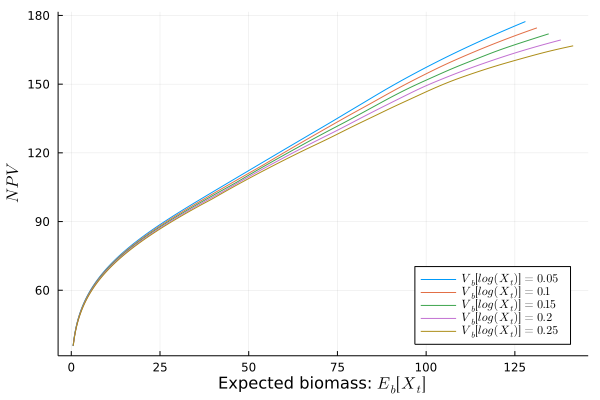

In [67]:
using Plots
using LaTeXStrings
@load "sol_6.jld2"
meanNodes = log(0.5):0.005:log(125)
Plots.plot(exp.(meanNodes.+0.5*0.05),broadcast(x->V6([x,0.05]), meanNodes), label = L"V_b[log(X_t)] = 0.05")
Plots.plot!(exp.(meanNodes.+0.5*0.1),broadcast(x->V6([x,0.1]), meanNodes), label = L"V_b[log(X_t)] = 0.1")
Plots.plot!(exp.(meanNodes.+0.5*0.15),broadcast(x->V6([x,0.15]), meanNodes), label = L"V_b[log(X_t)] = 0.15")
Plots.plot!(exp.(meanNodes.+0.5*0.2),broadcast(x->V6([x,0.2]), meanNodes), label = L"V_b[log(X_t)] = 0.2")
Plots.plot!(exp.(meanNodes.+0.5*0.25),broadcast(x->V6([x,0.25]), meanNodes), label = L"V_b[log(X_t)] = 0.25",
            xlab = string("Expected biomass: ", L"E_b[X_t]"), ylab = L"NPV", legend = :bottomright)

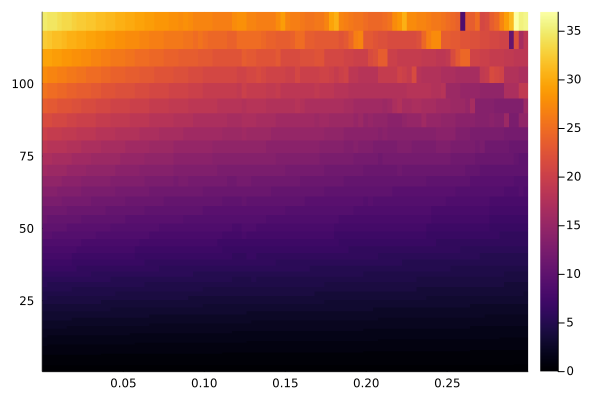

In [71]:
include("../examples/SurplusProduction.jl")
obj = objective2(0.925,(x,a) -> SurplusProduction.R2(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
N = 100
harvest = zeros(N,N)
monitoring = zeros(N,N)
for i in 1:N
    for j in 1:N
        harvest[i,j],monitoring[i,j]=MDPsolver.policy!(zeros(2),i,j,grid4,V7,obj,xQuad)
    end 
end 
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),harvest)

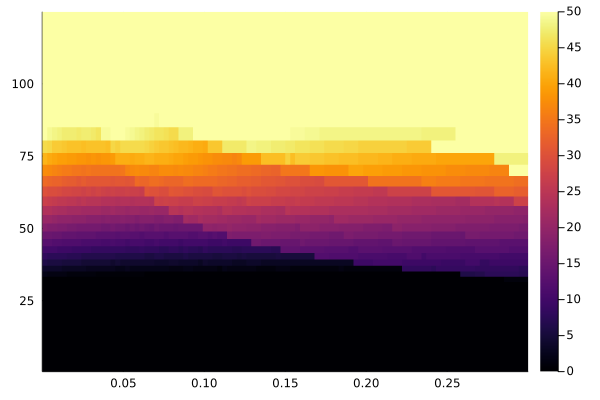

In [51]:
include("../examples/SurplusProduction.jl")
obj = objective2(0.925,(x,a) -> SurplusProduction.R(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
N = 100
harvest2 = zeros(N,N)
monitoring2 = zeros(N,N)
for i in 1:N
    for j in 1:N
        harvest2[i,j],monitoring2[i,j]=MDPsolver.policy!(zeros(2),i,j,grid4,V6,obj,xQuad)
    end 
end 
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),harvest2)

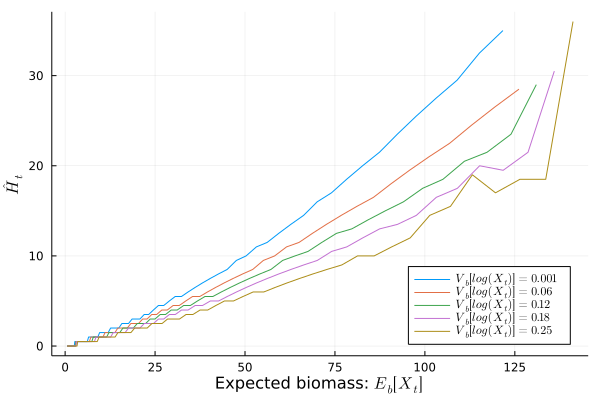

In [68]:
using LaTeXStrings
obj = objective2(0.925,(x,a) -> SurplusProduction.R2(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
Plots.plot(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]),
                broadcast(x->MDPsolver.policy!(zeros(2),x,1,grid4,V7,obj,xQuad)[1], 1:100),
               label = L"V_b[log(X_t)] = 0.001")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,25,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.06")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,50,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.12")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,75,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.18")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]),
                broadcast(x->MDPsolver.policy!(zeros(2),x,100,grid4,V7,obj,xQuad)[1], 1:100),
                label = L"V_b[log(X_t)] = 0.25", 
                xlab = string("Expected biomass: ", L"E_b[X_t]"), ylab = L"\hat{H}_t",
                legend =:bottomright)


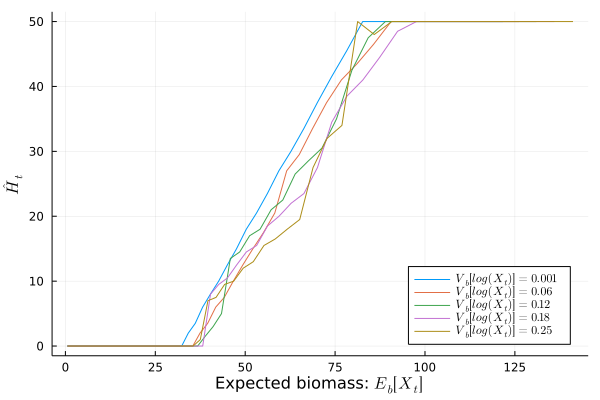

In [69]:
using LaTeXStrings
obj = objective2(0.925,(x,a) -> SurplusProduction.R(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
Plots.plot(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]),
                broadcast(x->MDPsolver.policy!(zeros(2),x,1,grid4,V6,obj,xQuad)[1], 1:100),
               label = L"V_b[log(X_t)] = 0.001")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,25,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.06")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,50,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.12")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]),
            broadcast(x->MDPsolver.policy!(zeros(2),x,75,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"V_b[log(X_t)] = 0.18")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]),
                broadcast(x->MDPsolver.policy!(zeros(2),x,100,grid4,V6,obj,xQuad)[1], 1:100),
                label = L"V_b[log(X_t)] = 0.25", 
                xlab = string("Expected biomass: ", L"E_b[X_t]"), ylab = L"\hat{H}_t",
                legend =:bottomright)

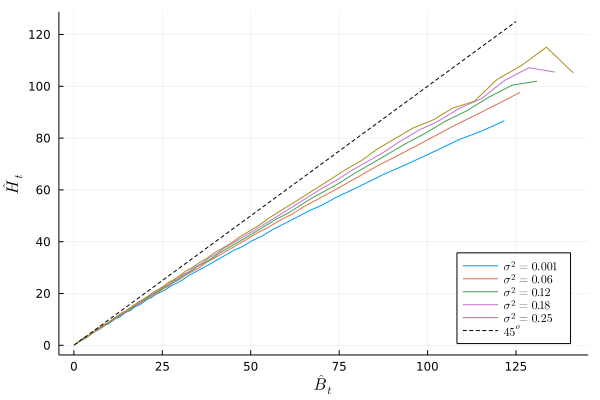

In [35]:
obj = objective2(0.925,(x,a) -> SurplusProduction.R2(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
Plots.plot(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]),
                exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,1,grid4,V7,obj,xQuad)[1], 1:100),
               label = L"\sigma^2 = 0.001")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,25,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.06")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,50,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.12")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,75,grid4,V7,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.18")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,100,grid4,V7,obj,xQuad)[1], 1:100),
                label = L"\sigma^2 = 0.25", 
                xlab = L"\hat{B}_t", ylab = L"\hat{H}_t",
                legend =:bottomright)
Plots.plot!([0,125],[0,125], color = "black", linestyle = :dash, label = L"45^o")


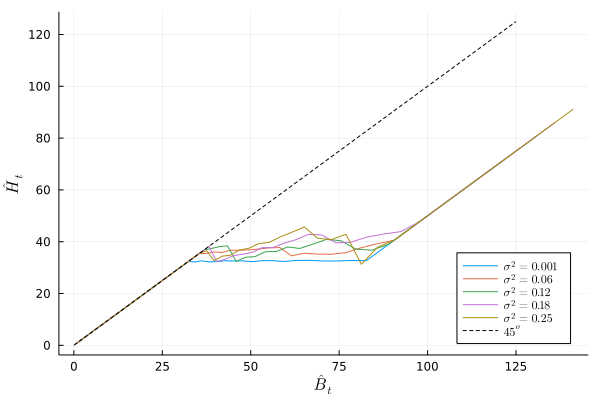

In [49]:
obj = objective2(0.925,(x,a) -> SurplusProduction.R(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
Plots.plot(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]),
                exp.(grid4.nodesMean.+0.5*grid4.nodesVar[1]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,1,grid4,V6,obj,xQuad)[1], 1:100),
               label = L"\sigma^2 = 0.001")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[25]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,25,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.06")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[50]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,50,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.12")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[75]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,75,grid4,V6,obj,xQuad)[1], 1:100), 
            label = L"\sigma^2 = 0.18")
Plots.plot!(exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]),
            exp.(grid4.nodesMean.+0.5*grid4.nodesVar[100]) .- broadcast(x->MDPsolver.policy!(zeros(2),x,100,grid4,V6,obj,xQuad)[1], 1:100),
                label = L"\sigma^2 = 0.25", 
                xlab = L"\hat{B}_t", ylab = L"\hat{H}_t",
                legend =:bottomright)
Plots.plot!([0,125],[0,125], color = "black", linestyle = :dash, label = L"45^o")

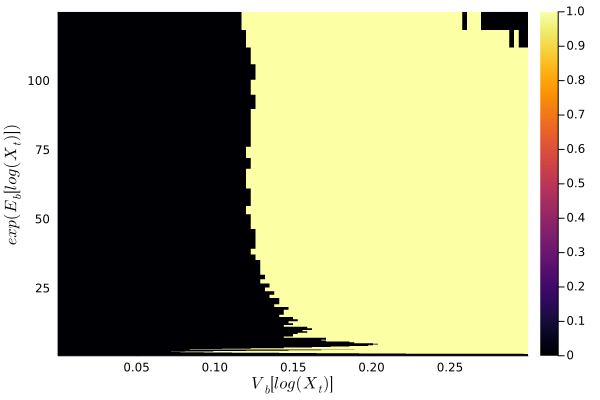

In [72]:
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),
                monitoring,
                xlab = L"V_b[log(X_t)]", 
                ylab = L"exp(E_b[log(X_t)])")

In [86]:
sigma = broadcast(i -> reshape(collect(Iterators.product(grid4.nodesMean,grid4.nodesVar)),
                length(grid4.nodesVar)*length(grid4.nodesMean))[i][1], 1:10000)
mu = broadcast(i -> reshape(collect(Iterators.product(grid4.nodesMean,grid4.nodesVar)),
                length(grid4.nodesVar)*length(grid4.nodesMean))[i][2], 1:10000)
value = reshape(monitoring,length(grid4.nodesVar)*length(grid4.nodesMean))

dat = hcat(hcat(sigma,mu),value)

using DelimitedFiles

writedlm( "monitoring_P7.csv",  dat, ',')

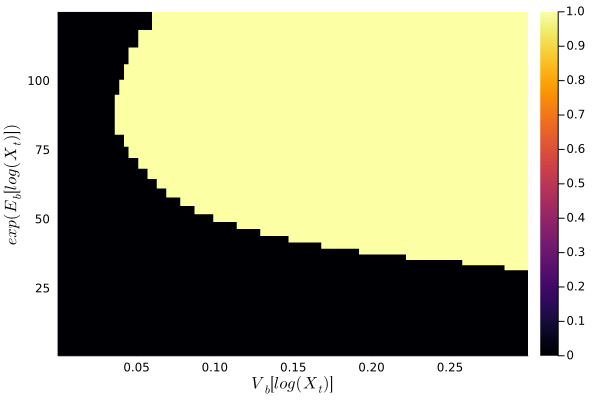

In [73]:
Plots.heatmap(grid4.nodesVar,exp.(grid4.nodesMean),
                monitoring2,
                xlab = L"V_b[log(X_t)]", 
                ylab = L"exp(E_b[log(X_t)])")

In [85]:
sigma = broadcast(i -> reshape(collect(Iterators.product(grid4.nodesMean,grid4.nodesVar)),
                length(grid4.nodesVar)*length(grid4.nodesMean))[i][1], 1:10000)
mu = broadcast(i -> reshape(collect(Iterators.product(grid4.nodesMean,grid4.nodesVar)),
                length(grid4.nodesVar)*length(grid4.nodesMean))[i][2], 1:10000)
value = reshape(monitoring2,length(grid4.nodesVar)*length(grid4.nodesMean))

dat = hcat(hcat(sigma,mu),value)

using DelimitedFiles

writedlm( "monitoring_P6.csv",  dat, ',')

In [53]:
include("MDPsolver.jl")
P7=MDPsolver.ValueFunctions.init_Norm2DGrid_policy(log(125.0),log(0.5),0.25,100)
P6=MDPsolver.ValueFunctions.init_Norm2DGrid_policy(log(125.0),log(0.5),0.25,100)
print(" ")

In [54]:
obj = objective2(0.925,(x,a) -> SurplusProduction.R2(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
MDPsolver.policy_parallel!(P7,grid4,V7,obj,xQuad;threashold = 10^-2)
@save "plicy_7.jld2" P7

obj = objective2(0.925,(x,a) -> SurplusProduction.R(x,a[1],a[2]),[(0.0,0),(1.0,0),(10.0,1)])
MDPsolver.policy_parallel!(P6,grid4,V6,obj,xQuad;threashold = 10^-2)
@save "plicy_6.jld2" P6
print(" ")

In [87]:
include("BeliefStateTransitions.jl")
include("MDPsolver.jl")
harvest = collect(0.0:0.5:50)
observations = [0,1]
actions = reshape(collect(Iterators.product(harvest, observations)), length(harvest)*length(observations))

model=BeliefStateTransitions.init_model(SurplusProduction.T,
    SurplusProduction.H,
    actions,
    SurplusProduction.Sigma_O2,
    SurplusProduction.Sigma_N,
    1)

s0 = ([log(100)], [0.25;;])
x0 = ([log(100), 0])
T = 100
dat=MDPsolver.simulation(x0,s0,T,P7,model)
print(" ")

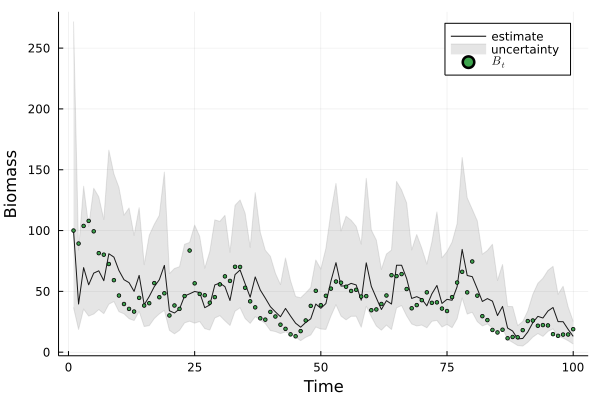

In [90]:
p1=Plots.plot(broadcast(i -> exp.(dat[2][i][1][1]), 1:T), color = "black", label = "estimate")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1] + 2*sqrt(dat[2][i][2][1])), 1:T), 
            fillrange = broadcast(i -> exp.(dat[2][i][1][1] - 2*sqrt(dat[2][i][2][1])), 1:T), 
            alpha =0.2, color = "grey", label = "uncertainty", ylab = "Biomass")
Plots.scatter!(broadcast(i -> exp(dat[1][i][1]), 1:T), markersize= 2, label = L"B_t")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]- 2*sqrt(dat[2][i][2][1])), 1:T), color = "grey",
            alpha = 0.2, label = "", xlabel = "Time")


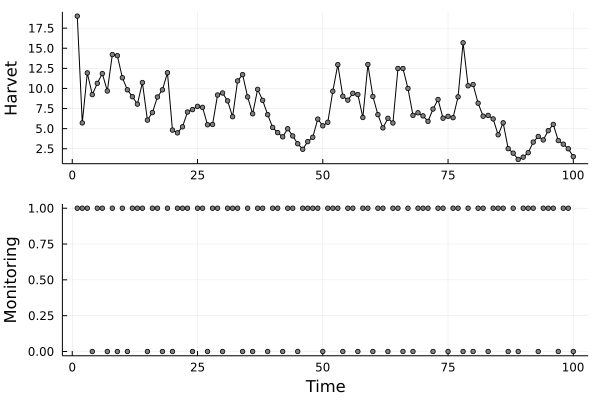

In [89]:
p1=Plots.plot(broadcast(i -> dat[3][i][1], 1:T), ylab = "Harvet", legend = false, color = "black")
Plots.scatter!(broadcast(i -> dat[3][i][1], 1:T), ylab = "Harvet", legend = false,
            color = "grey", markersize= 2.5)
p2=Plots.scatter(broadcast(i -> dat[3][i][2], 1:T), ylab = "Monitoring", xlab = "Time",
                legend = false, color = "grey", markersize= 2.5)
plot(p1,p2,layout=(2,1))

In [93]:
include("BeliefStateTransitions.jl")
include("MDPsolver.jl")
harvest = collect(0.0:0.5:50)
observations = [0,1]
actions = reshape(collect(Iterators.product(harvest, observations)), length(harvest)*length(observations))

model=BeliefStateTransitions.init_model(SurplusProduction.T,
    SurplusProduction.H,
    actions,
    SurplusProduction.Sigma_O2,
    SurplusProduction.Sigma_N,
    1)

s0 = ([log(100)], [0.25;;])
x0 = ([log(100), 0])
T = 100
dat=MDPsolver.simulation(x0,s0,T,P6,model)
print(" ")

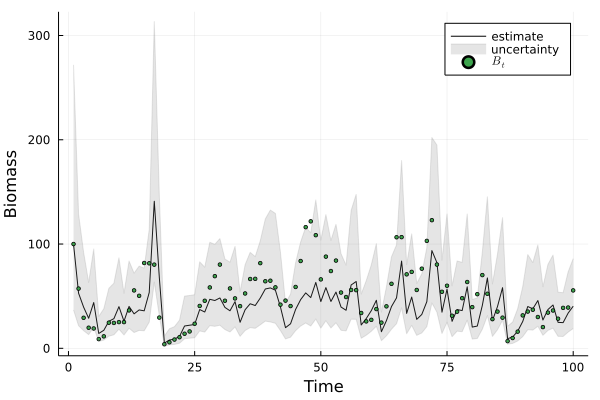

In [94]:
p1=Plots.plot(broadcast(i -> exp.(dat[2][i][1][1]), 1:T), color = "black", label = "estimate")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1] + 2*sqrt(dat[2][i][2][1])), 1:T), 
            fillrange = broadcast(i -> exp.(dat[2][i][1][1] - 2*sqrt(dat[2][i][2][1])), 1:T), 
            alpha =0.2, color = "grey", label = "uncertainty", ylab = "Biomass")
Plots.scatter!(broadcast(i -> exp(dat[1][i][1]), 1:T), markersize= 2, label = L"B_t")
Plots.plot!(broadcast(i -> exp.(dat[2][i][1][1]- 2*sqrt(dat[2][i][2][1])), 1:T), 
        color = "grey", alpha = 0.2, label = "", xlabel = "Time")



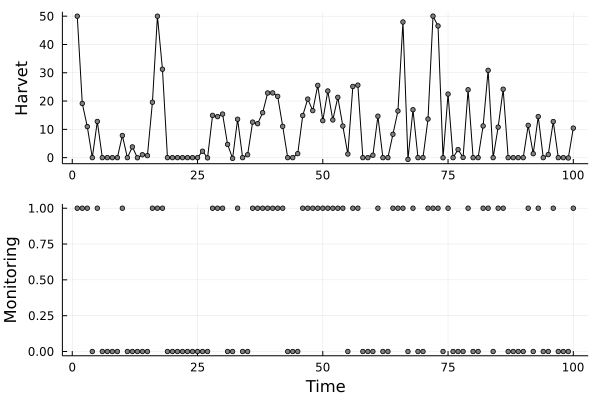

In [96]:
p1=Plots.plot(broadcast(i -> dat[3][i][1], 1:T), ylab = "Harvet", legend = false, color = "black")
Plots.scatter!(broadcast(i -> dat[3][i][1], 1:T), ylab = "Harvet", legend = false,
            color = "grey", markersize= 2.5)
p2=Plots.scatter(broadcast(i -> dat[3][i][2], 1:T), ylab = "Monitoring", xlab = "Time",
                legend = false, color = "grey", markersize= 2.5)
plot(p1,p2,layout=(2,1))

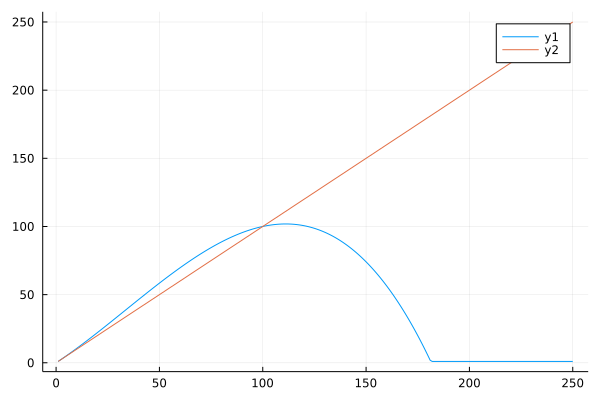

In [112]:
include("../examples/SurplusProduction.jl")

using Plots
Plots.plot(1:250, exp.(broadcast(i->SurplusProduction.Bt_allee([log(i)], 0.0, 10, 100)[1],1:250)))
Plots.plot!(1:250, 1:250)  

In [107]:
SurplusProduction.Bt_allee(log(10), 0.0, 10, 100)

1-element Vector{Float64}:
 2.361561298094343

In [110]:
SurplusProduction.Bt_allee([log(10)], 0.0, 10, 100)

1-element Vector{Float64}:
 2.361561298094343

In [1]:
using Optim

In [48]:
lower = -1.0
upper = 10
initial_x = 2.0
#inner_optimizer = GradientDescent()

f(x) = x^2-x
results = optimize(f, lower, upper)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-1.000000, 10.000000]
 * Minimizer: 5.000000e-01
 * Minimum: -2.500000e-01
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6

In [44]:
results.minimum

-0.25

In [45]:
results.minimizer

0.4999999999999989

In [53]:
typeof(results.minimum) == Float64

true